FCFS

FIRST COME FIRST SERVE SCHEDULING
Enter the number of processes: 3
Enter arrival time for process 1: 0
Enter burst time for process 1: 10
Enter arrival time for process 2: 1
Enter burst time for process 2: 5
Enter arrival time for process 3: 3
Enter burst time for process 3: 2

Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time	Response Time
P1	0		10		10		10		0		10
P2	1		5		15		14		9		15
P3	3		2		17		14		12		17

Average Turnaround Time: 12.666666666666666
Average Waiting Time: 7.0
Average Response Time: 14.0


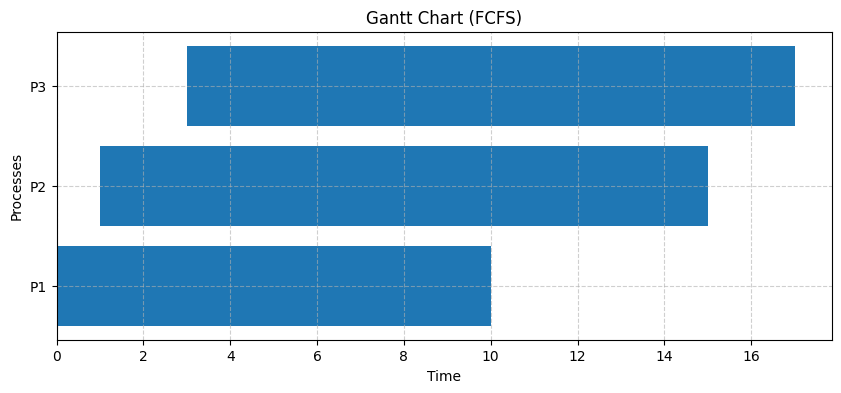

In [ ]:
import matplotlib.pyplot as plt
print("FIRST COME FIRST SERVE SCHEDULING")
def calculate_metrics(processes, n, bt):
    wt = [0] * n
    tat = [0] * n
    rt = [0] * n # Add a list for response time
    ct = [0] * n
    ct[0] = bt[0]
    for i in range(1, n):
        ct[i] = ct[i - 1] + bt[i]
    for i in range(n):
        tat[i] = ct[i] - processes[i][1]
        wt[i] = tat[i] - processes[i][2]
        rt[i] = ct[i] # Response time is the same as waiting time for
    avg_tat = sum(tat) / n
    avg_wt = sum(wt) / n
    avg_rt = sum(rt) / n # Calculate average response time
    return ct, tat, wt, rt, avg_tat, avg_wt, avg_rt
def main():
    n = int(input("Enter the number of processes: "))
    processes = []
    for i in range(n):
        arrival_time = int(input(f"Enter arrival time for process {i + 1}: "))
        burst_time = int(input(f"Enter burst time for process {i + 1}: "))
        processes.append((i + 1, arrival_time, burst_time))
    processes.sort(key=lambda x: x[1])
    burst_time_list = [process[2] for process in processes]
    completion_time, turnaround_time, waiting_time, response_time, avg_turnaround_time, avg_waiting_time, avg_response_time = calculate_metrics(processes, n, burst_time_list)
    print("\nProcess\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time\tResponse Time")
    for i in range(n):
        print(f"P{i + 1}\t{processes[i][1]}\t\t{processes[i][2]}\t\t{completion_time[i]}\t\t{turnaround_time[i]}\t\t{waiting_time[i]}\t\t{response_time[i]}")
    print(f"\nAverage Turnaround Time: {avg_turnaround_time}")
    print(f"Average Waiting Time: {avg_waiting_time}")
    print(f"Average Response Time: {avg_response_time}")
    # Create a Gantt chart
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.barh(f'P{processes[i][0]}', completion_time[i] - processes[i][1], left=processes[i][1], color='tab:blue')
    plt.xlabel('Time')
    plt.ylabel('Processes')
    plt.title('Gantt Chart (FCFS)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
main()

In [ ]:
n = int(input("enter the no of process:"))
process = []
for i in range(n):
  pid = int(input("enter the process id:"))
  at = int(input("enter the arrival time:"))
  bt = int(input("enter the burst time:"))
  process.append([pid,at,bt])
print(process)

enter the no of process:4
enter the process id:1
enter the arrival time:0
enter the burst time:7
enter the process id:2
enter the arrival time:0
enter the burst time:4
enter the process id:3
enter the arrival time:0
enter the burst time:3
enter the process id:4
enter the arrival time:0
enter the burst time:1
[[1, 0, 7], [2, 0, 4], [3, 0, 3], [4, 0, 1]]


#FCFS

In [ ]:
at_next = process[0][1] + process[0][2]
print(f"completion time{[process[0][0]]} : {at_next}")
for i in range(1,n):
  if process[i][1] > at_next:
    start_time = process[i][1]
  else:
    start_time = at_next
  at_next = start_time + process[i][2]
  print(f"completion time{[process[i][0]]} : {at_next}")

completion time[1] : 7
completion time[2] : 11
completion time[3] : 14
completion time[4] : 15


In [ ]:
#FCFS

completion_time = []
waiting_time = []
turnaround_time = []

completion_time.append(process[0][1] + process[0][2])
turnaround_time.append(completion_time[0] - process[0][1])
waiting_time.append(turnaround_time[0] - process[0][2])

for i in range(1, n):
  completion_time.append(max(completion_time[i-1], process[i][1]) + process[i][2])
  turnaround_time.append(completion_time[i] - process[i][1])
  waiting_time.append(turnaround_time[i] - process[i][2])

print("Process\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")
for i in range(n):
  print(f"{process[i][0]}\t{process[i][1]}\t\t{process[i][2]}\t\t{completion_time[i]}\t\t{turnaround_time[i]}\t\t{waiting_time[i]}")

Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
1	0		7		7		7		0
2	0		4		11		11		7
3	0		3		14		14		11
4	0		1		15		15		14


#SJF


In [ ]:
n = int(input("enter the no of process:"))
process = []
for i in range(n):
  pid = int(input("enter the process id:"))
  at = int(input("enter the arrival time:"))
  bt = int(input("enter the burst time:"))
  process.append([pid,at,bt])
print(process)

enter the no of process:4
enter the process id:1
enter the arrival time:3
enter the burst time:4
enter the process id:2
enter the arrival time:5
enter the burst time:3
enter the process id:3
enter the arrival time:0
enter the burst time:2
enter the process id:4
enter the arrival time:4
enter the burst time:3
[[1, 3, 4], [2, 5, 3], [3, 0, 2], [4, 4, 3]]


In [ ]:
#SJF
completion_time = {}
waiting_time = {}
turnaround_time = {}

sorted_processes = sorted(process, key=lambda x: x[1])

current_time = 0

for pid, at, bt in sorted_processes:
    if current_time < at:
        current_time = at
    current_time += bt
    completion_time[pid] = current_time
    turnaround_time[pid] = completion_time[pid] - at
    waiting_time[pid] = turnaround_time[pid] - bt

print("Process\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")

original_pids = [p[0] for p in process]
for pid in original_pids:

    original_process_info = next((p for p in process if p[0] == pid), None)
    if original_process_info:
        at = original_process_info[1]
        bt = original_process_info[2]
        print(f"{pid}\t{at}\t\t{bt}\t\t{completion_time.get(pid, 'N/A')}\t\t{turnaround_time.get(pid, 'N/A')}\t\t{waiting_time.get(pid, 'N/A')}")

Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
1	3		4		7		4		0
2	5		3		13		8		5
3	0		2		2		2		0
4	4		3		10		6		3


In [ ]:
total_waiting_time = sum(waiting_time.values())
total_turnaround_time = sum(turnaround_time.values())
num_processes = len(process)

average_waiting_time = total_waiting_time / num_processes
average_turnaround_time = total_turnaround_time / num_processes

print(f"\nAverage Waiting Time: {average_waiting_time:.2f}")
print(f"Average Turnaround Time: {average_turnaround_time:.2f}")


Average Waiting Time: 2.00
Average Turnaround Time: 5.00


preemptive sjf

In [ ]:
process = [
    (1, 3, 4),
    (2, 5, 3),
    (3, 0, 2),
    (4, 4, 3)
]

n = len(process)

# Initialize dictionaries
remaining_time = {pid: bt for pid, at, bt in process}
completion_time = {}
waiting_time = {}
turnaround_time = {}

# Sort by arrival time
process.sort(key=lambda x: x[1])

# For simulation
current_time = 0
completed = 0
ready_queue = []
visited = [False] * n
last_pid = -1

# Main loop until all processes are completed
while completed < n:
    # Add newly arrived processes to ready queue
    for i in range(n):
        pid, at, bt = process[i]
        if at == current_time and not visited[i]:
            ready_queue.append((pid, at, bt))
            visited[i] = True

    # Select process with the shortest remaining time
    available = [
        (pid, at, bt) for (pid, at, bt) in ready_queue if remaining_time[pid] > 0
    ]

    if available:
        # Pick process with shortest remaining time
        current_process = min(available, key=lambda x: remaining_time[x[0]])
        pid, at, bt = current_process

        # Execute 1 unit of time
        remaining_time[pid] -= 1
        current_time += 1

        if remaining_time[pid] == 0:
            completion_time[pid] = current_time
            completed += 1

    else:
        # If no process is available, just move forward
        current_time += 1

# Calculate Turnaround Time and Waiting Time
for pid, at, bt in process:
    tat = completion_time[pid] - at
    wt = tat - bt
    turnaround_time[pid] = tat
    waiting_time[pid] = wt

# Print results
print("Process\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")
for pid, at, bt in process:
    print(f"{pid}\t{at}\t\t{bt}\t\t{completion_time[pid]}\t\t{turnaround_time[pid]}\t\t{waiting_time[pid]}")


Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
3	0		2		2		2		0
1	3		4		7		4		0
4	4		3		10		6		3
2	5		3		13		8		5
